In [8]:
%matplotlib inline
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

In [3]:
class Dijkstra:

    def __init__(self, matr):
        self.matr = matr
        self.distances = {}
        self.paths = {}
             
    def calculate(self):
        for i in range(len(self.matr)):
            self.creator(i)

    def calculateFromOrigin(self, origin):
        prev = {}
        
        paths = defaultdict(list)
        paths[origin].append(origin)
                             
        num_points = len(self.matr)
        
        distance = [float("inf") for i in range(num_points)]
        distance[origin] = 0 
        
        priority = list(range(num_points))

        while len(priority):
            minner = self.minVertex(distance, priority)
            options = self.connections(self.matr[minner])
            priority.remove(minner)
            for [position, weight] in options:
                dist = distance[minner] + weight
                if distance[position] > dist:
                    distance[position] = dist
                    prev[position] = minner
        
        for point in prev:
            paths[point].insert(0, point)
            curr = prev[point]
            while(curr != origin):
                paths[point].insert(0, curr)
                curr = prev[curr]
            paths[point].insert(0, origin)
                
        return distance, dict(paths)
    
    def creator(self, origin):
        dists, paths = self.calculateFromOrigin(origin)
        dists_dict = {k:v for k,v in zip(range(len(self.matr)), dists) if v < float("inf")}
        self.distances[origin] = dists_dict
        self.paths[origin] = paths

    def minVertex(self, distances, priority):
        smallestKey = float("inf")
        smallestValue = float("inf")
        for i, item in enumerate(distances):
            if item <= smallestValue and i in priority:
                smallestValue = item
                smallestKey = i
        return smallestKey


    def connections(self, vector):
        return [[i, weight] for i, weight in enumerate(vector) if weight > 0]

In [4]:
class GraphHelper:
    
    def createGraph(matr):
        G = nx.DiGraph()
        for el1, vector in enumerate(matr):
            for el2, w in enumerate(vector):
                if w > 0: G.add_edge(el1, el2, weight=w)
        return G
        
    def printGraph(G, featured = 0):
        edge_labels = dict(((u,v), d['weight']) for u, v, d in G.edges(data=True))
        node_labels = {node:node for node in G.nodes()}

        plt.figure(num=None, figsize=(7, 7), dpi=400)

        pos = nx.spring_layout(G)
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
        nx.draw_networkx_labels(G, pos, labels=node_labels)
        
        if (featured):
            _featured = []
            for k, v in enumerate(featured):
                if (len(featured) >= k+2): _featured.append((v, featured[k+1]))
            edge_colors = ['blue' if not edge in _featured else 'red' for edge in G.edges()]
        else:
            edge_colors = 'blue'
        
        nx.draw(G, pos, node_size = 300, node_color = G.nodes(), cmap=plt.cm.Blues, edge_color=edge_colors)

        plt.show()

In [5]:
matr = [[0,0,2,11,0,3],
        [8,0,0,0,0,0],
        [0,7,0,5,0,0],
        [0,0,0,0,0,0],
        [0,0,6,0,0,0],
        [0,1,0,0,0,0]]

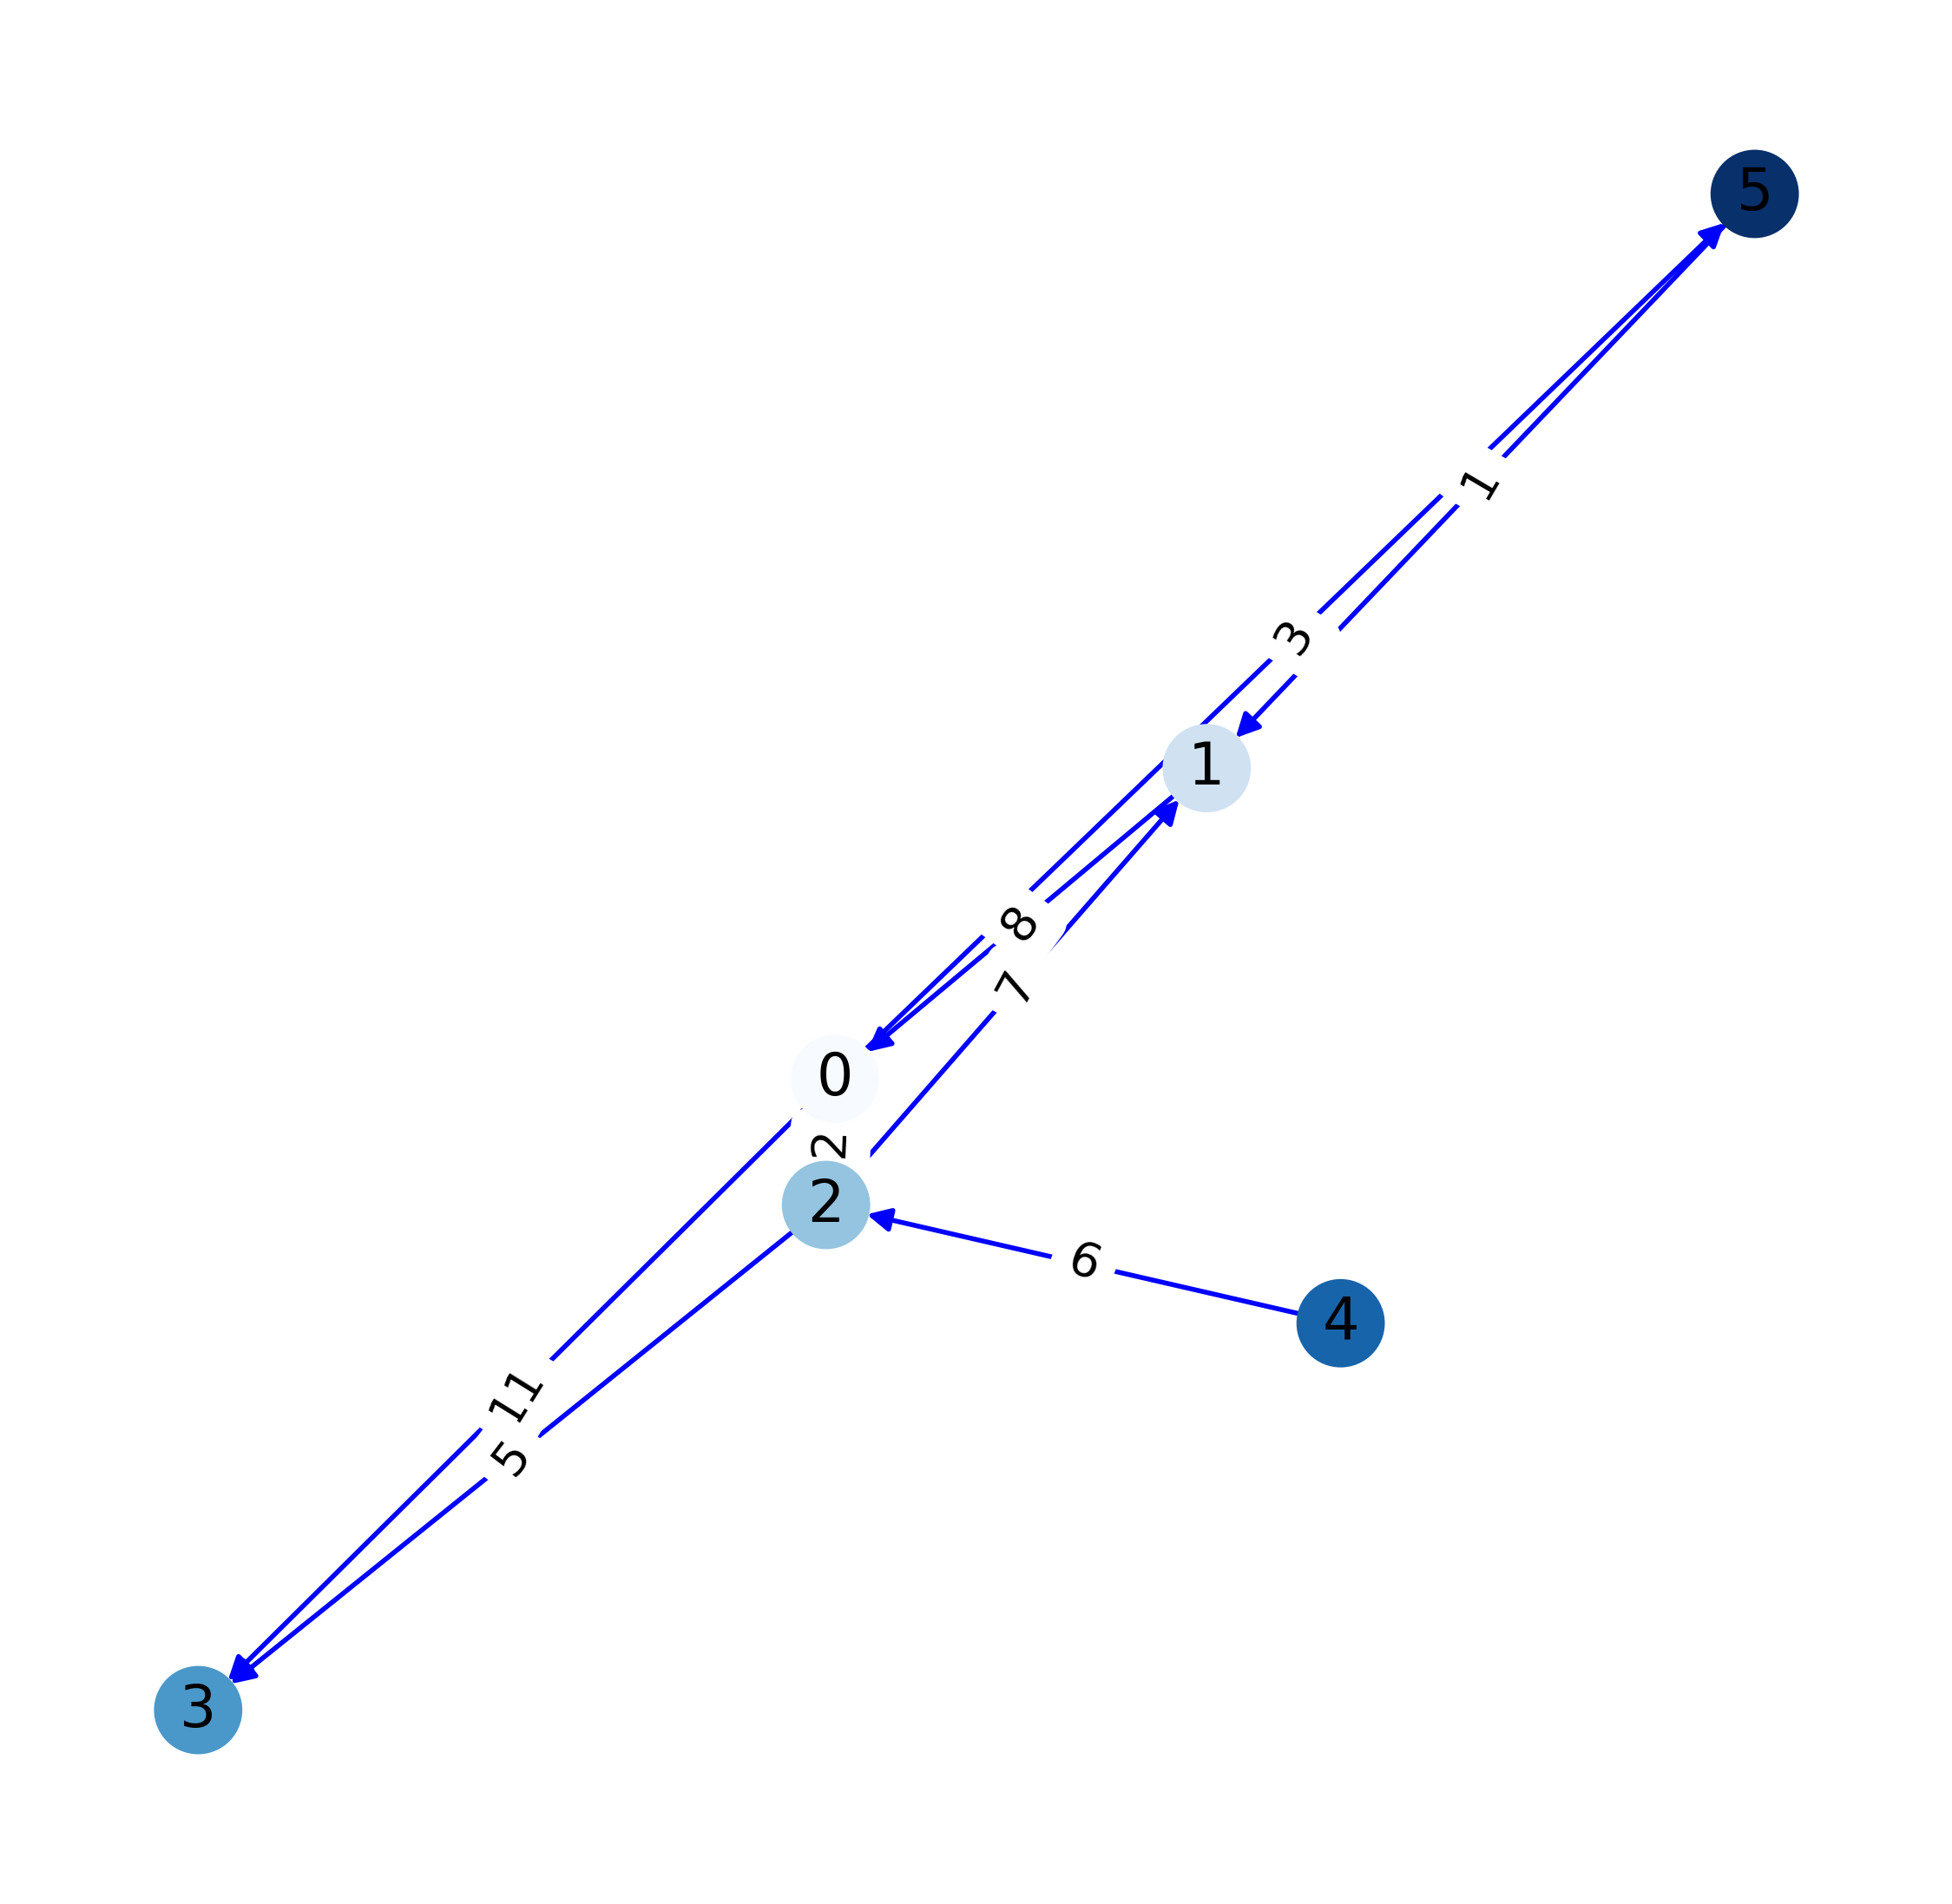

In [6]:
G=GraphHelper.createGraph(matr)
GraphHelper.printGraph(G)

In [7]:
type(G)

networkx.classes.digraph.DiGraph

In [493]:
nx_paths = dict(nx.all_pairs_dijkstra_path(G)) # source, target not specified
nx_distances = dict(nx.all_pairs_dijkstra_path_length(G))

In [494]:
dijk = Dijkstra(matr)
dijk.calculate()
distances, paths = dijk.distances, dijk.paths

In [505]:
def dijkstra_comparison(nx_paths, nx_distances, distances, paths):
    if nx_paths != paths:
        raise AssertionError("Dijkstra Paths not same as NetworkX")
    if nx_distances != distances:
        raise AssertionError("Dijkstra Path Lengths not same as NetworkX")
    print("Implemented Correctly!")

In [506]:
dijkstra_comparison(nx_paths, nx_distances, distances, paths)

Implemented Correctly!
